In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def get_random_means(data,k,d):# returns a K X D matrix of randomly initialized means
    maxmin_data = np.max(data,axis=0) - np.min(data,axis=0)
    maxmin_data = np.diag(maxmin_data)
    means = np.random.random([k,d]) # all number in range 0,1 real numbers
    means = np.dot(means,maxmin_data)
    means = np.transpose(means)
    for i in range(d):
        for j in range(k):
            means[i][j] = means[i][j] + np.min(data,axis=0)[i]
    return np.transpose(means)

In [4]:
def update_cluster_id(cluster_id,data,means):
    for i in range(data.shape[0]):
        cluster_id[i] = np.argmin ( np.sum( (data[i]-means)*(data[i]-means) , axis = 1 ) )
    return cluster_id

In [5]:
def update_means(cluster_id,data,means,k,d):
    sums = np.zeros(shape=(k,d))
    nums = np.zeros(k)
    for b in range(data.shape[0]):
        sums[int(cluster_id[b])]=sums[int(cluster_id[b])] + data[b]
        nums[int(cluster_id[b])]=nums[int(cluster_id[b])] + 1
    for a in range(k):
        means[a]=sums[a]/nums[a]
    return means

In [6]:
df = np.loadtxt('./clustering.txt')
data = df
df=np.transpose(df)

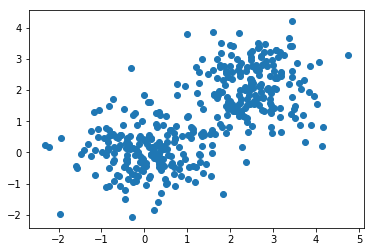

In [7]:
plt.scatter(df[0],df[1])

In [8]:
k=2 # number of clusters required
d=2 # dimension of data
iterations = 10
means = get_random_means(data,k,d)
cluster_id = np.zeros(data.shape[0])
for epoch in range(iterations):
    cluster_id = update_cluster_id(cluster_id,data,means)
    means = update_means(cluster_id,data,means,k,d)

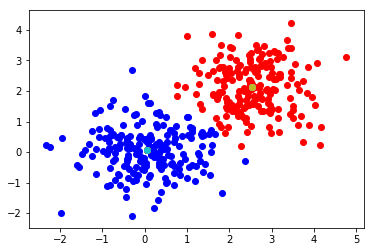

In [9]:
colors=["r","b","g","b","g","r"]
for i in range(data.shape[0]):
    plt.scatter(data[i][0],data[i][1],color=colors[int(cluster_id[i])])
    for mean_points in range(k):
        plt.scatter(means[mean_points][0],means[mean_points][1])